In [1]:
import requests
import os
import pandas as pd
import dask.dataframe as dd

In [2]:
TOKEN = "oPyGEjKlDCEBDZBpQhXpwQHqjBJUUOzY"
url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/{}"
headers={'token': TOKEN}

In [3]:
r = requests.get(url.format("datasets/GSOM"), headers=headers, )

In [4]:
r.json()

{'datacoverage': 1,
 'id': 'GSOM',
 'maxdate': '2017-07-01',
 'mindate': '1763-01-01',
 'name': 'Global Summary of the Month'}

In [ ]:
payload={'locationcategoryid':'CITY', 'sortfield':'name', 'sortorder':'desc', 'limit':1000}
#GHCND

In [ ]:
r = requests.get(url.format("locations"), headers=headers, params=payload)

In [ ]:
df = pd.DataFrame(r.json()['results'])
NYC = df[df['name'].str.contains("New York")]

In [26]:
NYCid = "CITY:US360019"

In [ ]:
payload = {'locationid':NYCid, 'datasetid':'GHCND', 'limit':1000}
r = requests.get(url.format("stations"), headers=headers, params=payload)
df = pd.DataFrame(r.json()['results'])
df[df['name'].str.contains('NY US')].to_csv("nyc_stations.csv", index=False)

In [12]:
#manually filtered that file
df = pd.read_csv('../data/stations_list.csv')

In [13]:
df

datacoverage  elevation elevationUnit                 id  latitude  \
0        0.9452       21.9        METERS  GHCND:US1NYRC0002   40.5674   
1        0.6659       10.7        METERS  GHCND:US1NYRC0001   40.5421   
2        0.9996       39.6        METERS  GHCND:USW00094728   40.7889   
3        0.6335        5.5        METERS  GHCND:US1NYKN0025   40.6846   
4        0.9240       24.1        METERS  GHCND:US1NYNS0007   40.7230   
5        0.8451       32.3        METERS  GHCND:US1NYQN0002   40.7145   
6        0.9999        3.4        METERS  GHCND:USW00014732   40.7792   
7        0.8741        3.4        METERS  GHCND:USW00094789   40.6386   

   longitude  maxdate     mindate                              name  
0   -74.1327   7/5/17     8/14/11       STATEN ISLAND 1.4 SE, NY US  
1   -74.1476  7/14/17      7/1/09      STATEN ISLAND 4.5 SSE, NY US  
2   -73.9669  7/14/17  1869-01-01       NY CITY CENTRAL PARK, NY US  
3   -73.9867  7/16/17    11/29/13            BROOKLYN 3.1 NW, NY US  
4   -73.7110  7/16/17    10/26/08          FLORAL PARK 0.4 W, NY US  
5   -73.8819  7/16/17      2/2/11      MIDDLE VILLAGE 0.5 SW, NY US  
6   -73.8800  7/16/17     10/7/39         LA GUARDIA AIRPORT, NY US  
7   -73.7622  7/16/17     7/17/48  JFK INTERNATIONAL AIRPORT, NY US

In [14]:
station_names = ["GHCND:USW00094728","GHCND:USW00014732", "GHCND:USW00094789"]

In [15]:
payload = {'datasetid':'GSOM', 'stationid':station_names, 
           'startdate':'2004-01-01', 'enddate':'2017-07-28'}
           
r = requests.get(url.format("datatypes"), headers=headers, params=payload)

In [16]:
df = pd.DataFrame(r.json()['results'])

In [17]:
df

datacoverage    id     maxdate     mindate  \
0              1  AWND  2017-06-01  1982-01-01   
1              1  CDSD  2017-06-01  1763-01-01   
2              1  CLDD  2017-06-01  1763-01-01   
3              1  DP01  2017-07-01  1781-01-01   
4              1  DP10  2017-07-01  1781-01-01   
5              1  DSND  2017-06-01  1871-11-01   
6              1  DSNW  2017-06-01  1840-05-01   
7              1  DT00  2017-06-01  1763-01-01   
8              1  DT32  2017-06-01  1763-01-01   
9              1  DX32  2017-06-01  1763-01-01   
10             1  DX70  2017-06-01  1763-01-01   
11             1  DX90  2017-06-01  1763-01-01   
12             1  EMNT  2017-06-01  1763-01-01   
13             1  EMSD  2017-06-01  1871-11-01   
14             1  EMSN  2017-06-01  1840-05-01   
15             1  EMXP  2017-07-01  1781-01-01   
16             1  EMXT  2017-06-01  1763-01-01   
17             1  HDSD  2017-06-01  1763-07-01   
18             1  HTDD  2017-06-01  1763-01-01   
19             1  PRCP  2017-07-01  1781-01-01   
20             1  SNOW  2017-06-01  1840-05-01   
21             1  TAVG  2017-06-01  1763-01-01   
22             1  TMAX  2017-06-01  1763-01-01   
23             1  TMIN  2017-06-01  1763-01-01   
24             1  WDF2  2017-06-01  1993-06-01   

                                                 name  
0                                  Average wind speed  
1                  Cooling Degree Days Season to Date  
2                                 Cooling Degree Days  
3   Number of days with greater than or equal to 0...  
4   Number of days with greater than or equal to 1...  
5   Number days with snow depth > 1 inch(25.4mm) f...  
6               Number days with snow depth > 1 inch.  
7   Number days with minimum temperature less than...  
8   Number days with minimum temperature less than...  
9        Number days with maximum temperature < 32 F.  
10  Number days with maximum temperature > 70 F (2...  
11  Number days with maximum temperature > 90 F (3...  
12        Extreme minimum temperature for the period.  
13         Extreme maximum snow depth for the period.  
14           Extreme maximum snowfall for the period.  
15      Extreme maximum precipitation for the period.  
16        Extreme maximum temperature for the period.  
17                 Heating Degree Days Season to Date  
18                                Heating degree days  
19                                      Precipitation  
20                                           Snowfall  
21                               Average Temperature.  
22                                Maximum temperature  
23                                Minimum temperature  
24                 Direction of fastest 2-minute wind

In [18]:
datatypes = ['AWND', 'PRCP', 'SNOW', 'TAVG', 'TMAX','TMIN', 'EMNT', 'EMSD', 'EMSN', "EMXP", "EMXT"]

alternatively just use ftp to get the files and then filter:

ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/

In [19]:
#can only request 1 year at a time
startdates = ['{}-01-01'.format(yr) for yr in range(2004, 2018)]
enddates = ['{}-12-31'.format(yr) for yr in range(2004, 2018)]
payload = {'datasetid':'GSOM', 'stationid':station_names, 
           'datatypeid': datatypes, 
           'units':'metric', 'limit':1000, 
          }

In [22]:
for sd, ed in zip(startdates, enddates):
    payload['startdate'] = sd
    payload['enddate'] = ed
    payload['offset'] = 0
    num_rows = 1
    print("started: {}".format(sd))
    while payload['offset'] < num_rows:
        fn = "../data/gsom/gsom_{}_{}.csv".format(sd[:4], payload['offset'])
        if not os.path.exists(fn):
            r = requests.get(url.format("data"), headers=headers, params=payload)
            results = r.json()
            num_rows = results['metadata']['resultset']['count']
            pd.DataFrame(results['results']).to_csv(fn, index=False)
        payload['offset'] += payload['limit']
    print("ended: {}".format(ed))
    

started: 2004-01-01
ended: 2004-12-31
started: 2005-01-01
ended: 2005-12-31
started: 2006-01-01
ended: 2006-12-31
started: 2007-01-01
ended: 2007-12-31
started: 2008-01-01
ended: 2008-12-31
started: 2009-01-01
ended: 2009-12-31
started: 2010-01-01
ended: 2010-12-31
started: 2011-01-01
ended: 2011-12-31
started: 2012-01-01
ended: 2012-12-31
started: 2013-01-01
ended: 2013-12-31
started: 2014-01-01
ended: 2014-12-31
started: 2015-01-01
ended: 2015-12-31
started: 2016-01-01
ended: 2016-12-31
started: 2017-01-01
ended: 2017-12-31


In [102]:
df = dd.read_csv("../data/gsom/gsom*.csv")

In [103]:
ghcn = df.compute()

In [104]:
ghcn = ghcn.drop('attributes', axis=1)

In [105]:
ghcn['date'] = pd.to_datetime(ghcn['date'])

In [106]:
ghcn.dtypes

datatype            object
date        datetime64[ns]
station             object
value              float64
dtype: object

In [161]:
gsom = ghcn.groupby([pd.Grouper(freq='Qs-Dec',key='date'), 'datatype','station']).mean()

In [162]:
gsom.keys()

Index(['value'], dtype='object')

In [187]:
gs = gsom.unstack("station")["value"]

In [193]:
gs = gs.reset_index().rename(columns={'station':'id'})

In [194]:
stations = pd.read_csv("../data/stations_list.csv")

In [231]:
gsc = gs.rename(columns = dict(zip(stations['id'], stations['name'])))

In [233]:
gsc.to_csv("gsom_seasonal.csv", index=False)

In [206]:
gss = gs.merge(stations, left_on="name", right_on="id")[["date","datatype","name","value"]]

KeyError: 'name'

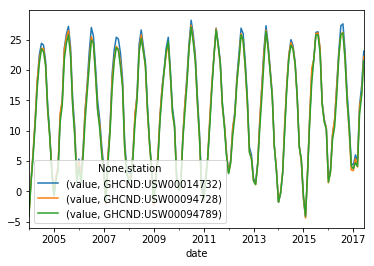

In [42]:
%matplotlib inline
ghcn[ghcn['datatype'].str.match("TAVG")].groupby(["date","station"]).sum().unstack().plot()

In [143]:
ghcn

datatype       date            station  value
0       AWND 2004-01-01  GHCND:USW00014732    6.4
1       EMNT 2004-01-01  GHCND:USW00014732  -16.7
2       EMSD 2004-01-01  GHCND:USW00014732  254.0
3       EMSN 2004-01-01  GHCND:USW00014732  130.0
4       EMXP 2004-01-01  GHCND:USW00014732   14.2
5       EMXT 2004-01-01  GHCND:USW00014732   13.9
6       PRCP 2004-01-01  GHCND:USW00014732   50.1
7       SNOW 2004-01-01  GHCND:USW00014732  454.0
8       TAVG 2004-01-01  GHCND:USW00014732   -3.5
9       TMAX 2004-01-01  GHCND:USW00014732   -0.1
10      TMIN 2004-01-01  GHCND:USW00014732   -7.0
11      AWND 2004-01-01  GHCND:USW00094728    4.0
12      EMNT 2004-01-01  GHCND:USW00094728  -17.2
13      EMSD 2004-01-01  GHCND:USW00094728  305.0
14      EMSN 2004-01-01  GHCND:USW00094728  152.0
15      EMXP 2004-01-01  GHCND:USW00094728   14.2
16      EMXT 2004-01-01  GHCND:USW00094728   14.4
17      PRCP 2004-01-01  GHCND:USW00094728   54.2
18      SNOW 2004-01-01  GHCND:USW00094728  439.0
19      TAVG 2004-01-01  GHCND:USW00094728   -4.0
20      TMAX 2004-01-01  GHCND:USW00094728   -0.6
21      TMIN 2004-01-01  GHCND:USW00094728   -7.5
22      AWND 2004-01-01  GHCND:USW00094789    6.6
23      EMNT 2004-01-01  GHCND:USW00094789  -17.2
24      EMSD 2004-01-01  GHCND:USW00094789  203.0
25      EMSN 2004-01-01  GHCND:USW00094789  102.0
26      EMXP 2004-01-01  GHCND:USW00094789   13.2
27      EMXT 2004-01-01  GHCND:USW00094789   11.1
28      PRCP 2004-01-01  GHCND:USW00094789   48.8
29      SNOW 2004-01-01  GHCND:USW00094789  352.0
..       ...        ...                ...    ...
168     EMSN 2017-06-01  GHCND:USW00014732    0.0
169     EMXP 2017-06-01  GHCND:USW00014732   32.0
170     EMXT 2017-06-01  GHCND:USW00014732   38.3
171     PRCP 2017-06-01  GHCND:USW00014732  111.3
172     SNOW 2017-06-01  GHCND:USW00014732    0.0
173     TAVG 2017-06-01  GHCND:USW00014732   23.1
174     TMAX 2017-06-01  GHCND:USW00014732   27.3
175     TMIN 2017-06-01  GHCND:USW00014732   18.9
176     AWND 2017-06-01  GHCND:USW00094728    1.9
177     EMNT 2017-06-01  GHCND:USW00094728   10.6
178     EMSD 2017-06-01  GHCND:USW00094728    0.0
179     EMSN 2017-06-01  GHCND:USW00094728    0.0
180     EMXP 2017-06-01  GHCND:USW00094728   35.3
181     EMXT 2017-06-01  GHCND:USW00094728   34.4
182     PRCP 2017-06-01  GHCND:USW00094728  121.1
183     SNOW 2017-06-01  GHCND:USW00094728    0.0
184     TAVG 2017-06-01  GHCND:USW00094728   22.2
185     TMAX 2017-06-01  GHCND:USW00094728   26.3
186     TMIN 2017-06-01  GHCND:USW00094728   18.1
187     AWND 2017-06-01  GHCND:USW00094789    4.8
188     EMNT 2017-06-01  GHCND:USW00094789   10.6
189     EMSD 2017-06-01  GHCND:USW00094789    0.0
190     EMSN 2017-06-01  GHCND:USW00094789    0.0
191     EMXP 2017-06-01  GHCND:USW00094789   43.9
192     EMXT 2017-06-01  GHCND:USW00094789   34.4
193     PRCP 2017-06-01  GHCND:USW00094789  106.7
194     SNOW 2017-06-01  GHCND:USW00094789    0.0
195     TAVG 2017-06-01  GHCND:USW00094789   21.5
196     TMAX 2017-06-01  GHCND:USW00094789   25.9
197     TMIN 2017-06-01  GHCND:USW00094789   17.1

[5343 rows x 4 columns]

In [84]:
ghcnp = ghcn.pivot_table(index='date', columns=["datatype", "station"], values="value")

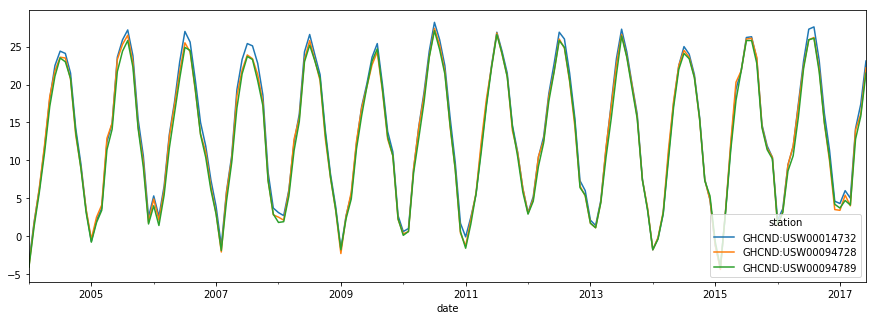

In [90]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
ghcnp['TAVG'].plot(ax=ax)

In [97]:
ghcn.to_csv("../data/gsom.csv", index=False)

In [101]:
ghcn

datatype       date            station  value
0       AWND 2004-01-01  GHCND:USW00014732    6.4
1       EMNT 2004-01-01  GHCND:USW00014732  -16.7
2       EMSD 2004-01-01  GHCND:USW00014732  254.0
3       EMSN 2004-01-01  GHCND:USW00014732  130.0
4       EMXP 2004-01-01  GHCND:USW00014732   14.2
5       EMXT 2004-01-01  GHCND:USW00014732   13.9
6       PRCP 2004-01-01  GHCND:USW00014732   50.1
7       SNOW 2004-01-01  GHCND:USW00014732  454.0
8       TAVG 2004-01-01  GHCND:USW00014732   -3.5
9       TMAX 2004-01-01  GHCND:USW00014732   -0.1
10      TMIN 2004-01-01  GHCND:USW00014732   -7.0
11      AWND 2004-01-01  GHCND:USW00094728    4.0
12      EMNT 2004-01-01  GHCND:USW00094728  -17.2
13      EMSD 2004-01-01  GHCND:USW00094728  305.0
14      EMSN 2004-01-01  GHCND:USW00094728  152.0
15      EMXP 2004-01-01  GHCND:USW00094728   14.2
16      EMXT 2004-01-01  GHCND:USW00094728   14.4
17      PRCP 2004-01-01  GHCND:USW00094728   54.2
18      SNOW 2004-01-01  GHCND:USW00094728  439.0
19      TAVG 2004-01-01  GHCND:USW00094728   -4.0
20      TMAX 2004-01-01  GHCND:USW00094728   -0.6
21      TMIN 2004-01-01  GHCND:USW00094728   -7.5
22      AWND 2004-01-01  GHCND:USW00094789    6.6
23      EMNT 2004-01-01  GHCND:USW00094789  -17.2
24      EMSD 2004-01-01  GHCND:USW00094789  203.0
25      EMSN 2004-01-01  GHCND:USW00094789  102.0
26      EMXP 2004-01-01  GHCND:USW00094789   13.2
27      EMXT 2004-01-01  GHCND:USW00094789   11.1
28      PRCP 2004-01-01  GHCND:USW00094789   48.8
29      SNOW 2004-01-01  GHCND:USW00094789  352.0
..       ...        ...                ...    ...
168     EMSN 2017-06-01  GHCND:USW00014732    0.0
169     EMXP 2017-06-01  GHCND:USW00014732   32.0
170     EMXT 2017-06-01  GHCND:USW00014732   38.3
171     PRCP 2017-06-01  GHCND:USW00014732  111.3
172     SNOW 2017-06-01  GHCND:USW00014732    0.0
173     TAVG 2017-06-01  GHCND:USW00014732   23.1
174     TMAX 2017-06-01  GHCND:USW00014732   27.3
175     TMIN 2017-06-01  GHCND:USW00014732   18.9
176     AWND 2017-06-01  GHCND:USW00094728    1.9
177     EMNT 2017-06-01  GHCND:USW00094728   10.6
178     EMSD 2017-06-01  GHCND:USW00094728    0.0
179     EMSN 2017-06-01  GHCND:USW00094728    0.0
180     EMXP 2017-06-01  GHCND:USW00094728   35.3
181     EMXT 2017-06-01  GHCND:USW00094728   34.4
182     PRCP 2017-06-01  GHCND:USW00094728  121.1
183     SNOW 2017-06-01  GHCND:USW00094728    0.0
184     TAVG 2017-06-01  GHCND:USW00094728   22.2
185     TMAX 2017-06-01  GHCND:USW00094728   26.3
186     TMIN 2017-06-01  GHCND:USW00094728   18.1
187     AWND 2017-06-01  GHCND:USW00094789    4.8
188     EMNT 2017-06-01  GHCND:USW00094789   10.6
189     EMSD 2017-06-01  GHCND:USW00094789    0.0
190     EMSN 2017-06-01  GHCND:USW00094789    0.0
191     EMXP 2017-06-01  GHCND:USW00094789   43.9
192     EMXT 2017-06-01  GHCND:USW00094789   34.4
193     PRCP 2017-06-01  GHCND:USW00094789  106.7
194     SNOW 2017-06-01  GHCND:USW00094789    0.0
195     TAVG 2017-06-01  GHCND:USW00094789   21.5
196     TMAX 2017-06-01  GHCND:USW00094789   25.9
197     TMIN 2017-06-01  GHCND:USW00094789   17.1

[5343 rows x 4 columns]